In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv', encoding='ISO-8859-1')

In [6]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [8]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
df['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'WEAPONS VIOLATION', 'BATTERY', 'ASSAULT',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'SEX OFFENSE', 'ROBBERY', 'NARCOTICS',
       'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER', 'BURGLARY',
       'ARSON', 'OFFENSE INVOLVING CHILDREN', 'INTIMIDATION',
       'PUBLIC PEACE VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'KIDNAPPING', 'STALKING', 'LIQUOR LAW VIOLATION', 'PROSTITUTION',
       'GAMBLING', 'OBSCENITY', 'PUBLIC INDECENCY', 'HUMAN TRAFFICKING',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL'], dtype=object)

In [12]:
theft_filter = df[df['Primary Type'] == 'THEFT']
theft_filter2 = theft_filter[theft_filter['Description'] == 'FROM BUILDING']
theft_filter3 = theft_filter2[theft_filter2['Location Description'] == 'RESIDENCE'] 
theft_filter3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
304,13428794,JH224599,04/14/2024 09:30:00 AM,109XX S EDBROOKE AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,9,49.0,06,1179188.0,1832438.0,2024,12/21/2024 03:40:46 PM,41.695495,-87.619551,"(41.695495401, -87.619550795)"
882,13438622,JH236403,04/15/2024 04:20:00 AM,040XX N KENMORE AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,46,3.0,06,1168440.0,1927196.0,2024,12/21/2024 03:40:46 PM,41.955759,-87.656168,"(41.955758568, -87.656168264)"
1721,13431398,JH227799,04/16/2024 11:09:00 AM,018XX S ASHLAND AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,25,31.0,06,1166007.0,1891394.0,2024,12/21/2024 03:40:46 PM,41.857568,-87.666136,"(41.857567911, -87.666136197)"
1926,13433632,JH230566,04/16/2024 04:20:00 PM,020XX N POINT ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1,22.0,06,1157857.0,1913510.0,2024,12/21/2024 03:40:46 PM,41.918426,-87.695448,"(41.918426135, -87.695448086)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247641,13803432,JJ215208,04/09/2025 02:32:00 PM,055XX S KILDARE AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,13,62.0,06,1148645.0,1867432.0,2025,04/17/2025 03:42:17 PM,41.792165,-87.730483,"(41.792165371, -87.73048254)"
247661,13800916,JJ212206,04/09/2025 03:00:00 PM,091XX S CHAPPEL AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,7,48.0,06,1191437.0,1844761.0,2025,04/17/2025 03:42:17 PM,41.729024,-87.574306,"(41.729023707, -87.57430596)"
247796,13801642,JJ213150,04/09/2025 07:00:00 PM,029XX S HILLOCK AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,11,60.0,06,1166805.0,1885689.0,2025,04/17/2025 03:42:17 PM,41.841896,-87.663370,"(41.841895811, -87.663370449)"
247948,13803831,JJ215903,04/10/2025 12:01:00 AM,028XX S DR MARTIN LUTHER KING JR DR,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,4,35.0,06,1179378.0,1886082.0,2025,04/18/2025 03:42:00 PM,41.842696,-87.617220,"(41.842695834, -87.61721984)"


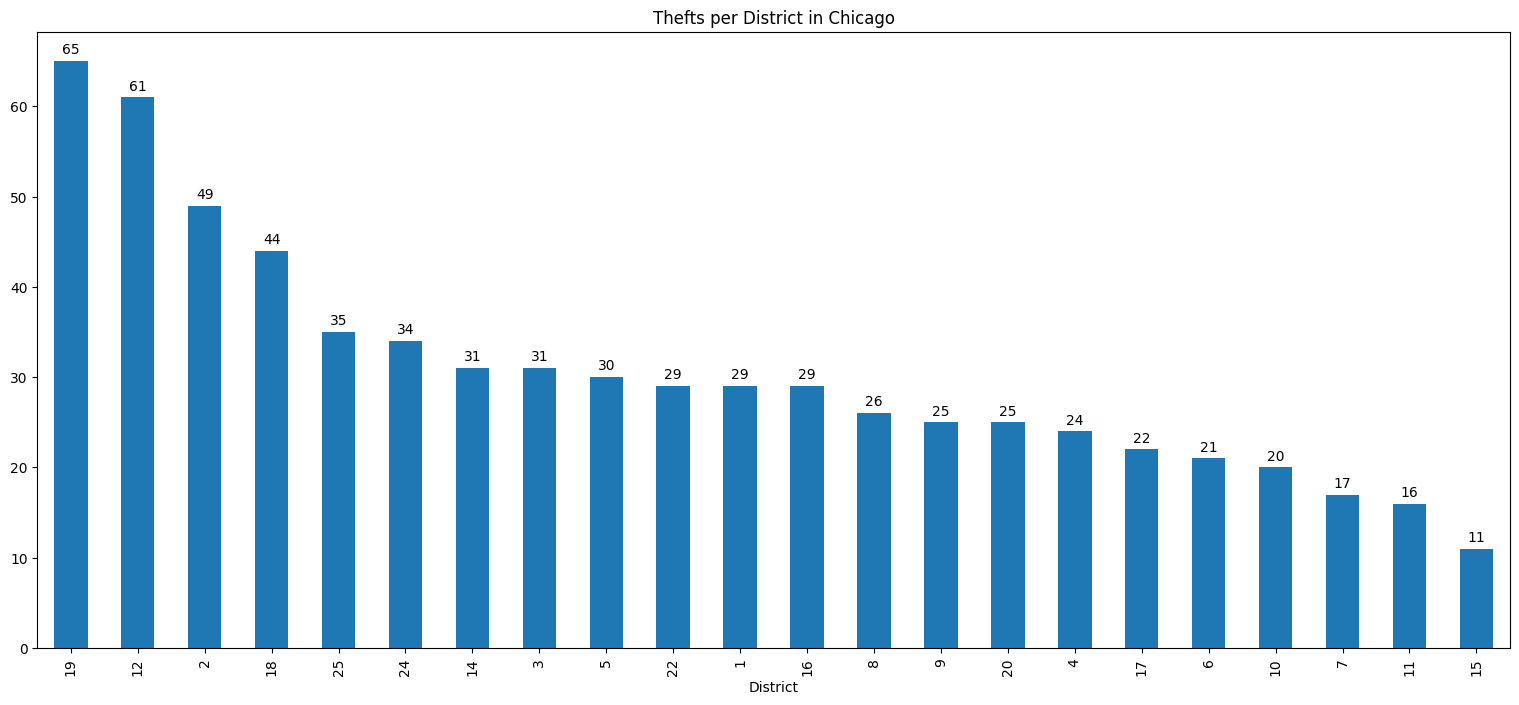

In [74]:
bar1 = theft_filter3['District'].value_counts()
ax = bar1.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Thefts per District in Chicago')
plt.show()

In [13]:
theft_coords = theft_filter3.groupby(['Latitude', 'Longitude']).size().reset_index(name = 'incident_count')
theft_coords

,Latitude,Longitude,incident_count
0,41.654382,-87.603688,1
1,41.660564,-87.635025,1
2,41.662531,-87.636603,1
3,41.668361,-87.633173,1
4,41.671777,-87.638103,1
...,...,...,...
643,42.017490,-87.700616,1
644,42.017904,-87.676986,1
645,42.018518,-87.681638,1
646,42.018734,-87.686520,1


In [51]:
theft_hdata = theft_coords[['Latitude', 'Longitude', 'incident_count']].values.tolist()
theft_map = folium.Map(location = [41, -87], zoom_start = 9)
HeatMap(theft_hdata).add_to(theft_map)

In [52]:
theft_map

In [65]:
mvt_filter = df[df['Primary Type'] == 'MOTOR VEHICLE THEFT']
mvt_filter2 = mvt_filter[mvt_filter['Description'] == 'AUTOMOBILE']
mvt_filter3 = mvt_filter2[mvt_filter2['Location Description'] == 'RESIDENCE'] 
mvt_filter3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
978,13430457,JH226376,04/15/2024 09:00:00 AM,131XX S EBERHART AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,9,54.0,07,1181750.0,1818303.0,2024,12/21/2024 03:40:46 PM,41.656648,-87.610605,"(41.656648271, -87.610604609)"
1241,13430323,JH226419,04/15/2024 04:30:00 PM,131XX S VERNON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,9,54.0,07,1181480.0,1818476.0,2024,12/21/2024 03:40:46 PM,41.657129,-87.611587,"(41.657129217, -87.611587267)"
1866,13432708,JH229274,04/16/2024 03:00:00 PM,075XX S ELLIS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,8,69.0,07,1184198.0,1855248.0,2024,12/21/2024 03:40:46 PM,41.757973,-87.600497,"(41.757973261, -87.600496671)"
2059,13431547,JH228041,04/16/2024 07:42:00 PM,040XX S DR MARTIN LUTHER KING JR DR,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,True,True,...,3,38.0,07,1179520.0,1878393.0,2024,12/21/2024 03:40:46 PM,41.821593,-87.616934,"(41.8215934, -87.616934059)"
3271,13433965,JH230923,04/18/2024 05:00:00 PM,040XX W BARRY AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,31,21.0,07,1148970.0,1920308.0,2024,12/21/2024 03:40:46 PM,41.937257,-87.727923,"(41.937257203, -87.727923485)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242728,13792501,JJ202081,04/01/2025 10:00:00 AM,111XX S RACINE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,21,75.0,07,1170321.0,1830702.0,2025,04/09/2025 03:41:19 PM,41.690929,-87.652066,"(41.690928595, -87.6520661)"
243595,13794996,JJ204020,04/02/2025 08:00:00 PM,108XX S EGGLESTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,True,...,21,49.0,07,1175215.0,1832940.0,2025,04/10/2025 03:41:13 PM,41.696962,-87.634082,"(41.696962393, -87.634082307)"
244801,13796421,JJ206778,04/04/2025 07:30:00 PM,079XX S ESSEX AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,7,46.0,07,1194234.0,1852798.0,2025,04/12/2025 03:41:14 PM,41.751010,-87.563797,"(41.751009781, -87.563796798)"
245187,13799606,JJ210601,04/05/2025 11:30:00 AM,128XX S UNION AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,False,False,...,9,53.0,07,1173993.0,1819792.0,2025,04/13/2025 03:41:18 PM,41.660909,-87.638945,"(41.660909312, -87.638944525)"


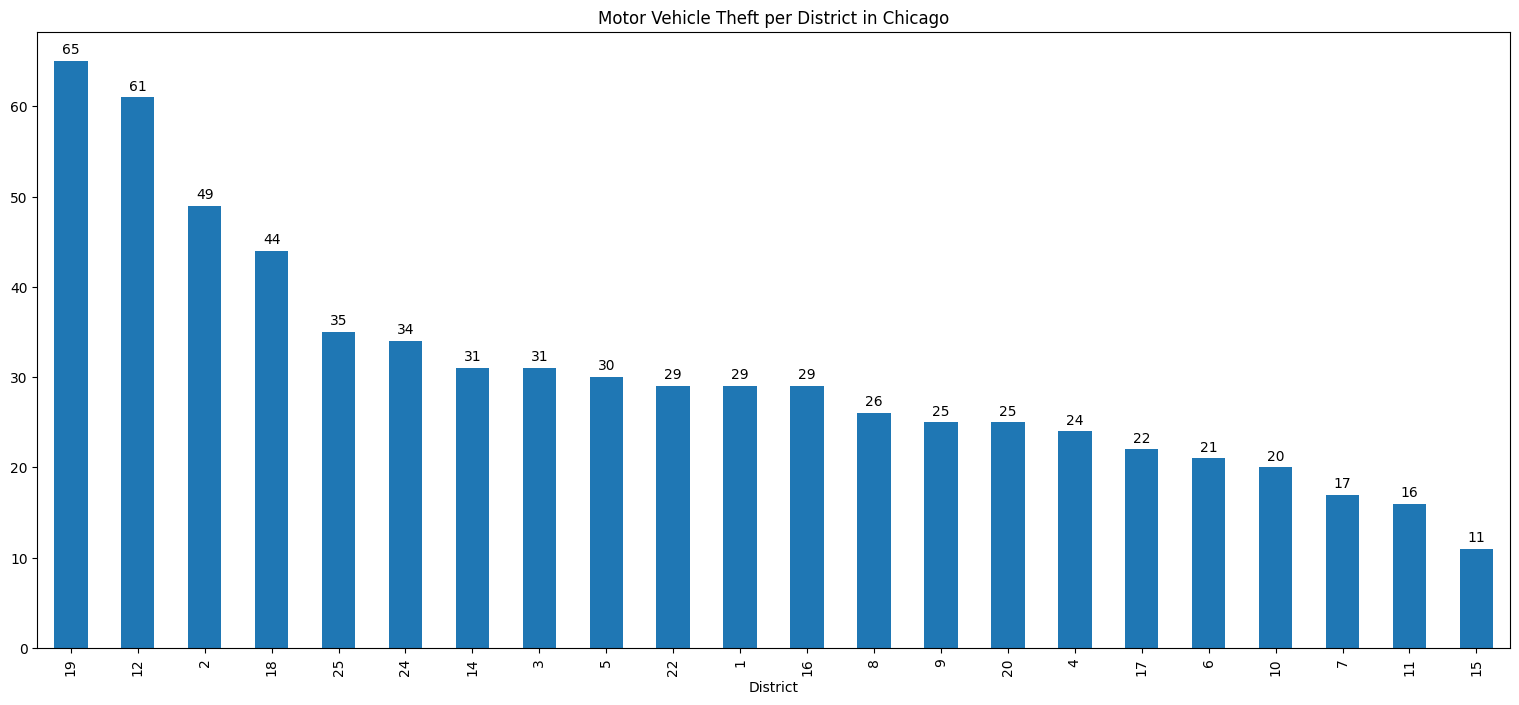

In [76]:
bar2 = mvt_filter3['District'].value_counts()
ax = bar1.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Motor Vehicle Theft per District in Chicago')
plt.show()

In [66]:
mvt_coords = mvt_filter3.groupby(['Latitude', 'Longitude']).size().reset_index(name = 'incident_count')
mvt_coords

,Latitude,Longitude,incident_count
0,41.647922,-87.613395,1
1,41.651431,-87.527258,3
2,41.652739,-87.618720,1
3,41.654647,-87.617100,1
4,41.654807,-87.547148,1
...,...,...,...
397,42.001200,-87.700045,1
398,42.008981,-87.709229,1
399,42.009258,-87.709223,1
400,42.011474,-87.671142,1


In [67]:
mvt_hdata = mvt_coords[['Latitude', 'Longitude', 'incident_count']].values.tolist()
mvt_map = folium.Map(location = [41, -87], zoom_start = 9)
HeatMap(mvt_hdata).add_to(mvt_map)

In [68]:
mvt_map